In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

'[' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#hide
from fastbook import *

### Set device to CUDA if available

In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(f"pytorch version: {torch.__version__}")


Using device: cuda
pytorch version: 2.4.0+cu124


### Simple example to show fast.ai usage

In [5]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.168700,0.026193,0.012179,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.060283,0.017605,0.003383,00:29


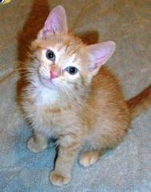

In [6]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### Example of method to allow user to input own dataset

In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

## Deep Learning Is Not Just for Image Classification

In [13]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.653248,1.911300,00:00


epoch,train_loss,valid_loss,time
0,1.494671,1.503743,00:00
1,1.338413,1.304467,00:00
2,1.188490,0.972637,00:00
3,1.064146,0.941644,00:00
4,0.961580,0.826458,00:00
5,0.878143,0.784088,00:00
6,0.807491,0.789740,00:00
7,0.750977,0.772759,00:00


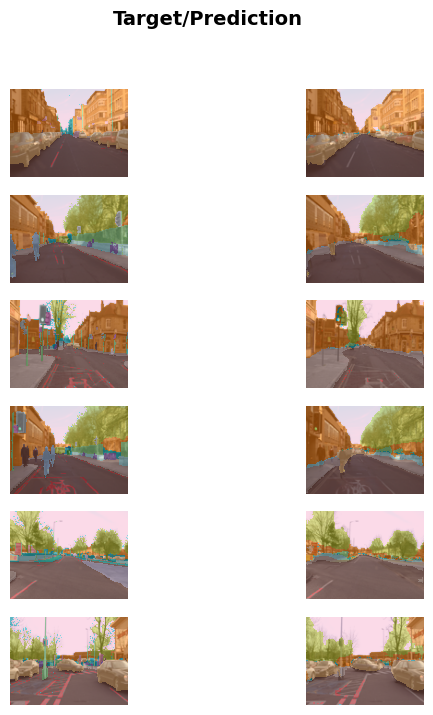

In [14]:
learn.show_results(max_n=6, figsize=(7,8))

### Example for Sentiment Analysis

In [30]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


c:\Users\jared\OneDrive\Desktop\fastbook\fastai\Lib\site-packages\fastai\text\learner.py:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map

epoch,train_loss,valid_loss,accuracy,time
0,0.468081,0.394500,0.822360,03:31


epoch,train_loss,valid_loss,accuracy,time
0,0.307129,0.249962,0.896560,08:58
1,0.245351,0.213841,0.913600,01:21
2,0.183327,0.202366,0.925880,01:21
3,0.142932,0.191434,0.929000,01:27


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [31]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([4.3084e-05, 9.9996e-01]))

### Example for Tabular data

In [32]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

c:\Users\jared\OneDrive\Desktop\fastbook\fastai\Lib\site-packages\fastai\tabular\core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [33]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378659,0.377332,0.825092,00:03
1,0.360470,0.353871,0.837531,00:03
2,0.349544,0.350600,0.836149,00:03


### Example on Collaborative Filtering

In [34]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.500895,1.414317,00:00


epoch,train_loss,valid_loss,time
0,1.388213,1.363524,00:00
1,1.323376,1.213583,00:00
2,1.088322,0.922876,00:00
3,0.834649,0.756107,00:00
4,0.696659,0.714196,00:00
5,0.641988,0.703825,00:00
6,0.611903,0.696678,00:00
7,0.608920,0.693507,00:00
8,0.577495,0.691995,00:00
9,0.579012,0.691830,00:00


In [35]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,23.0,94.0,3.0,3.245112
1,57.0,64.0,4.0,3.490838
2,8.0,47.0,5.0,4.731093
3,62.0,71.0,5.0,3.922758
4,21.0,42.0,3.5,3.144117
5,72.0,60.0,3.5,3.336873
6,56.0,29.0,4.0,4.508042
7,89.0,92.0,5.0,4.195554
8,75.0,57.0,5.0,4.574290
